In [1]:
from Bayesian_Neural_Network import bayesian_neural_network
from BNN_Learning_Rate_Tuning import bnn_learning_rate_tuning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Data Preparation

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
feature_columns = df.columns[1:-2]
target_columns = df.columns[-1]

In [5]:
for feature_column in feature_columns:
    df[feature_column] -= np.min(df[feature_column])
    df[feature_column] /= np.max(df[feature_column])

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,...,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124,88.349619,0.001727
std,47488.145955,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,...,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698,250.120109,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54201.500000,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,...,0.557798,0.484730,0.663030,0.334454,0.560104,0.372036,0.415203,0.312049,5.600000,0.000000
50%,84692.000000,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,...,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352,22.000000,0.000000
75%,139320.500000,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,...,0.564484,0.534688,0.667626,0.441460,0.597593,0.464807,0.418191,0.314712,77.165000,0.000000
max,172792.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25691.160000,1.000000


# Model Performance On 100 Samples of Non-Fraudulent Data

In [7]:
df_0 = df.loc[df['Class'] == 0, :].head(100)

In [8]:
feature_data = df_0.loc[:, feature_columns].values.reshape(-1, 28, 1)
target_data = df_0.loc[:, target_columns].values

In [16]:
input_layer = [28]
hidden_layers = [64, 32, 16, 8, 4, 2]
output_layer = [1]

total_epochs = 100
learning_rate = 1e-52

error_type = 'accuracy'
learning_rate_decay_type = 'exponential'

In [17]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, error_type, learning_rate=learning_rate)
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [18]:
bnn.train_model(total_epochs)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 100 - Learning Rate : 1e-52 - Succesfull Train Percentage : 100.0% - Time Passed : 0.55 Second
Accuracy : 100.0% - Standard Deviation : 0.0
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 100 - Learning Rate : 1e-52 - Succesfull Train Percentage : 100.0% - Time Passed : 0.54 Second
Accuracy : 100.0% - Standard Deviation : 8.307066286275135e-18
------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------

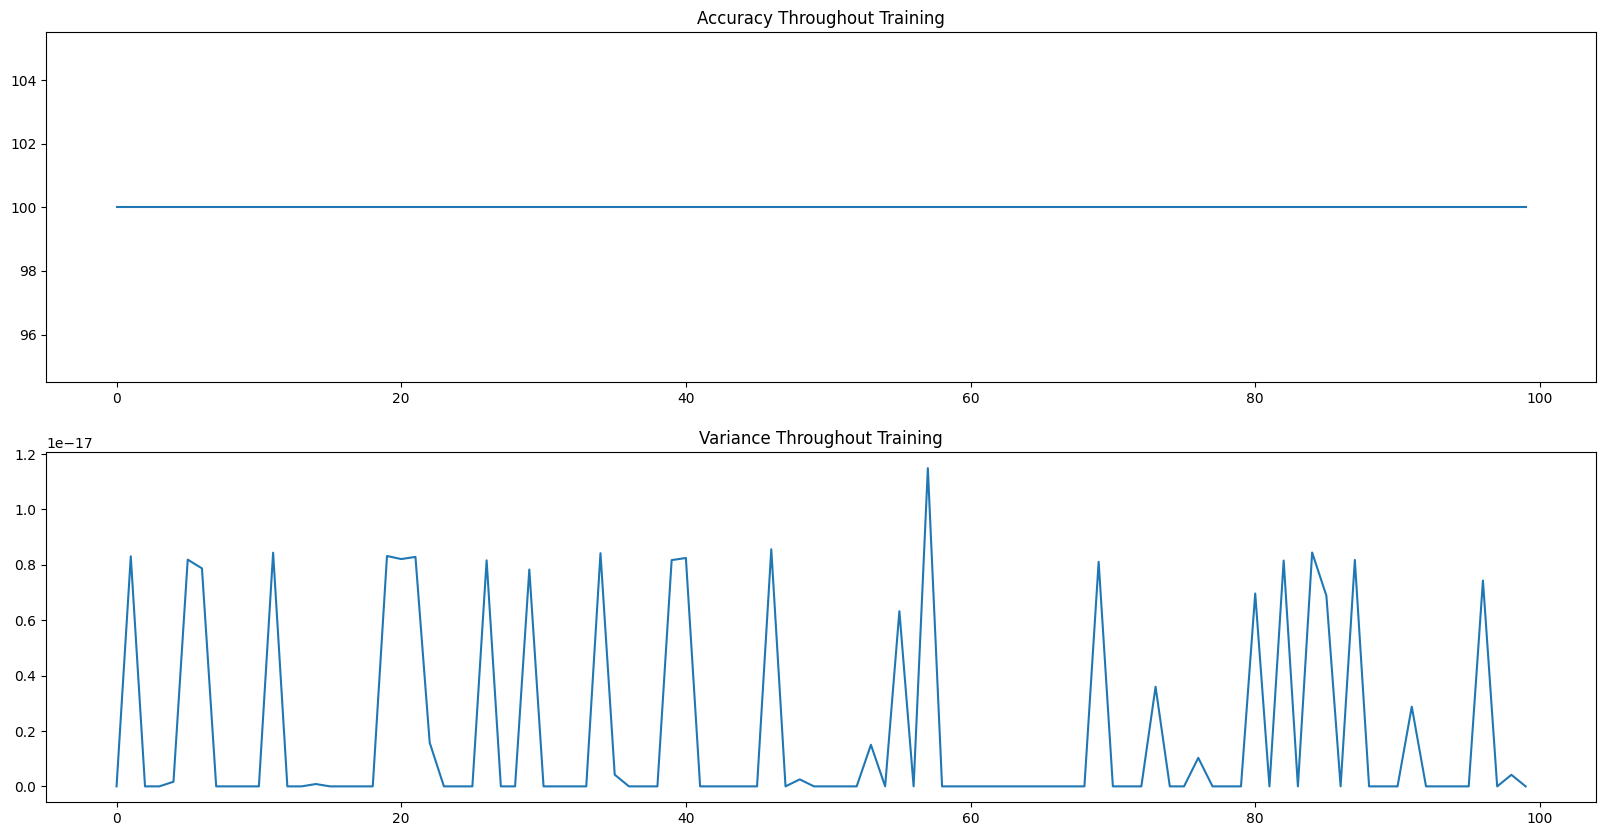

In [19]:
bnn.visualize_performance()

# Model Performance On 100 Samples of Fraudulent Data

In [22]:
df_1 = df.loc[df['Class'] == 1, :].head(100)

In [23]:
feature_data = df_1.loc[:, feature_columns].values.reshape(-1, 28, 1)
target_data = df_1.loc[:, target_columns].values

In [40]:
input_layer = [28]
hidden_layers = [64, 32, 16, 8, 4, 2]
output_layer = [1]

total_epochs = 100
learning_rate = 1e-28

error_type = 'accuracy'
learning_rate_decay_type = 'exponential'

In [41]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, error_type, learning_rate=learning_rate)
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [42]:
bnn.train_model(total_epochs)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 100 - Learning Rate : 1e-28 - Succesfull Train Percentage : 100.0% - Time Passed : 0.55 Second
Accuracy : 100.0% - Standard Deviation : 1.372997942863956e-11
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 100 - Learning Rate : 1e-28 - Succesfull Train Percentage : 100.0% - Time Passed : 0.54 Second
Accuracy : 12.0% - Standard Deviation : 1.4536112618988474e-11
------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------

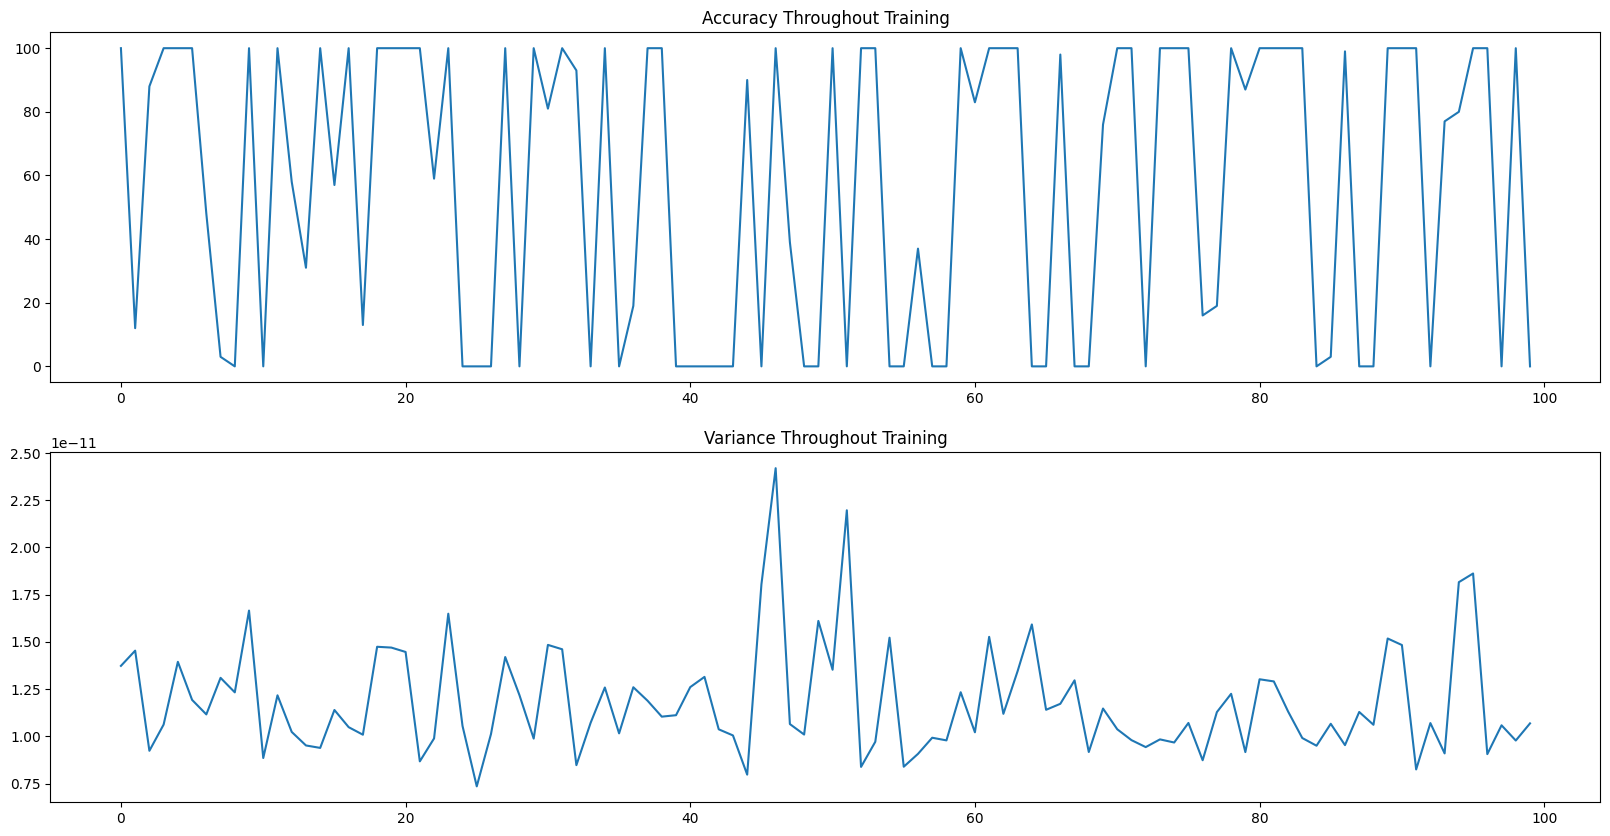

In [43]:
bnn.visualize_performance()

# Model Performance On 50 Samples of Non-Fraudulent Data and 25 Samples of Fraudulent Data

In [44]:
df_0 = df.loc[df['Class'] == 0, :].head(50)
df_1 = df.loc[df['Class'] == 1, :].head(50)
df_0_1 = pd.concat([df_0, df_1]).sample(frac=1)

In [45]:
feature_data = df_0_1.loc[:, feature_columns].values.reshape(-1, 28, 1)
target_data = df_0_1.loc[:, target_columns].values

In [46]:
input_layer = [28]
hidden_layers = [256, 128, 64, 32, 16, 8, 4, 2]
output_layer = [1]

total_epochs = 100
learning_rate = 1e-40

error_type = 'accuracy'
learning_rate_decay_type = 'exponential'

In [47]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, error_type, learning_rate=learning_rate)
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [48]:
bnn.train_model(total_epochs)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 100 - Learning Rate : 1e-40 - Succesfull Train Percentage : 100.0% - Time Passed : 2.8 Second
Accuracy : 61.0% - Standard Deviation : 0.49985467902718583
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 100 - Learning Rate : 1e-40 - Succesfull Train Percentage : 100.0% - Time Passed : 2.9 Second
Accuracy : 50.0% - Standard Deviation : 0.4979101222027794
------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------

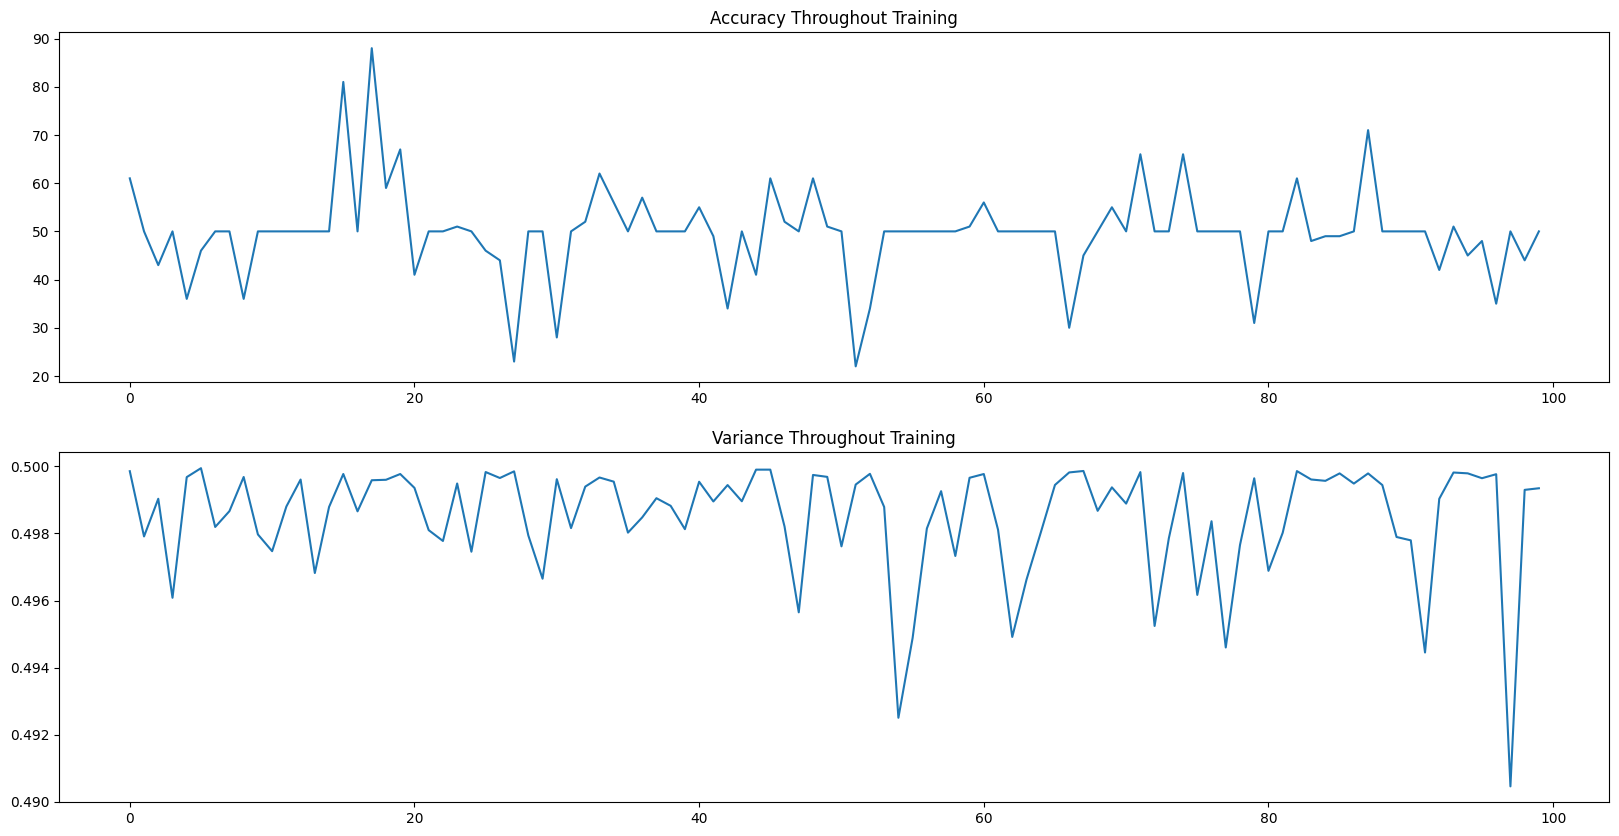

In [49]:
bnn.visualize_performance()